In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [28]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
last_date_str = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
last_date_str

'2017-08-23'

In [32]:
last_date = dt.date.fromisoformat(last_date_str)
last_date

datetime.date(2017, 8, 23)

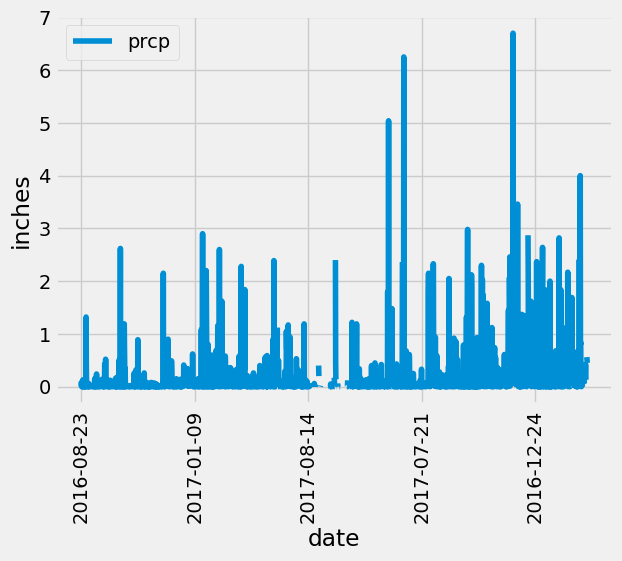

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year_ago = last_date-dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation)

# Sort the dataframe by date
precipitation_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x="date",y ="prcp", rot= 90)
plt.ylabel("inches")
plt.show()

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_query =session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

In [37]:
session.query(station.station).all()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [38]:
most_active = station_query[0][0]

datetime.date(2016, 8, 23)

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

In [48]:
start = dt.date(2016,1,23)
end = dt.date(2017, 8, 23)
temps_df = pd.DataFrame(session.query(measurement.date, measurement.prcp).filter(measurement.date >= start).all())
temp_list = []

temps = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.date >= start, measurement.date <= end).all()
temps

[(56.0, 87.0, 74.31599552572708)]

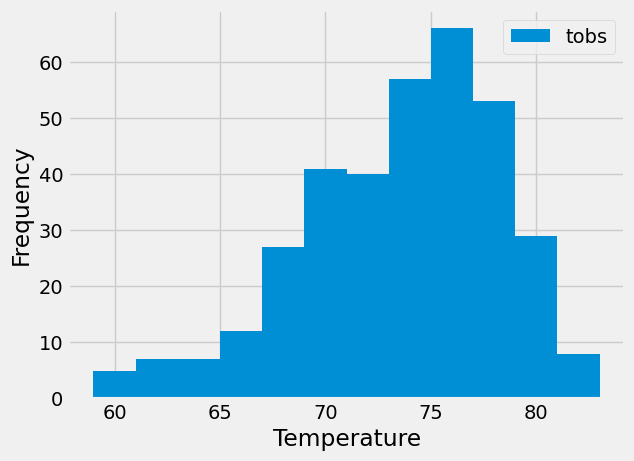

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yeartemp = session.query(measurement.tobs).filter(measurement.date >= year_ago).filter(measurement.station == most_active).all()
yeartemp
year_tempdf = pd.DataFrame(yeartemp)
year_tempdf.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [35]:
# Close Session
session.close()